In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,make_scorer,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [82]:
#Read data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [83]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [85]:
train.shape

(1460, 81)

In [86]:
test.shape

(1459, 80)

In [87]:
#Drop the id column which is not required 
train.drop(['Id'],axis=1,inplace=True)

In [88]:
train.shape

(1460, 80)

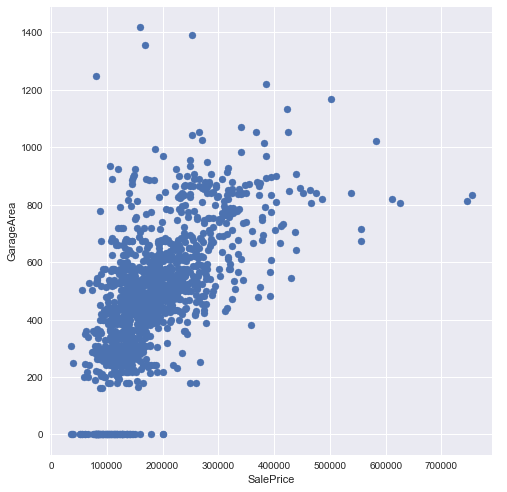

In [89]:
sns.FacetGrid(train,size=7)\
.map(plt.scatter,'SalePrice','GarageArea')\
.add_legend()

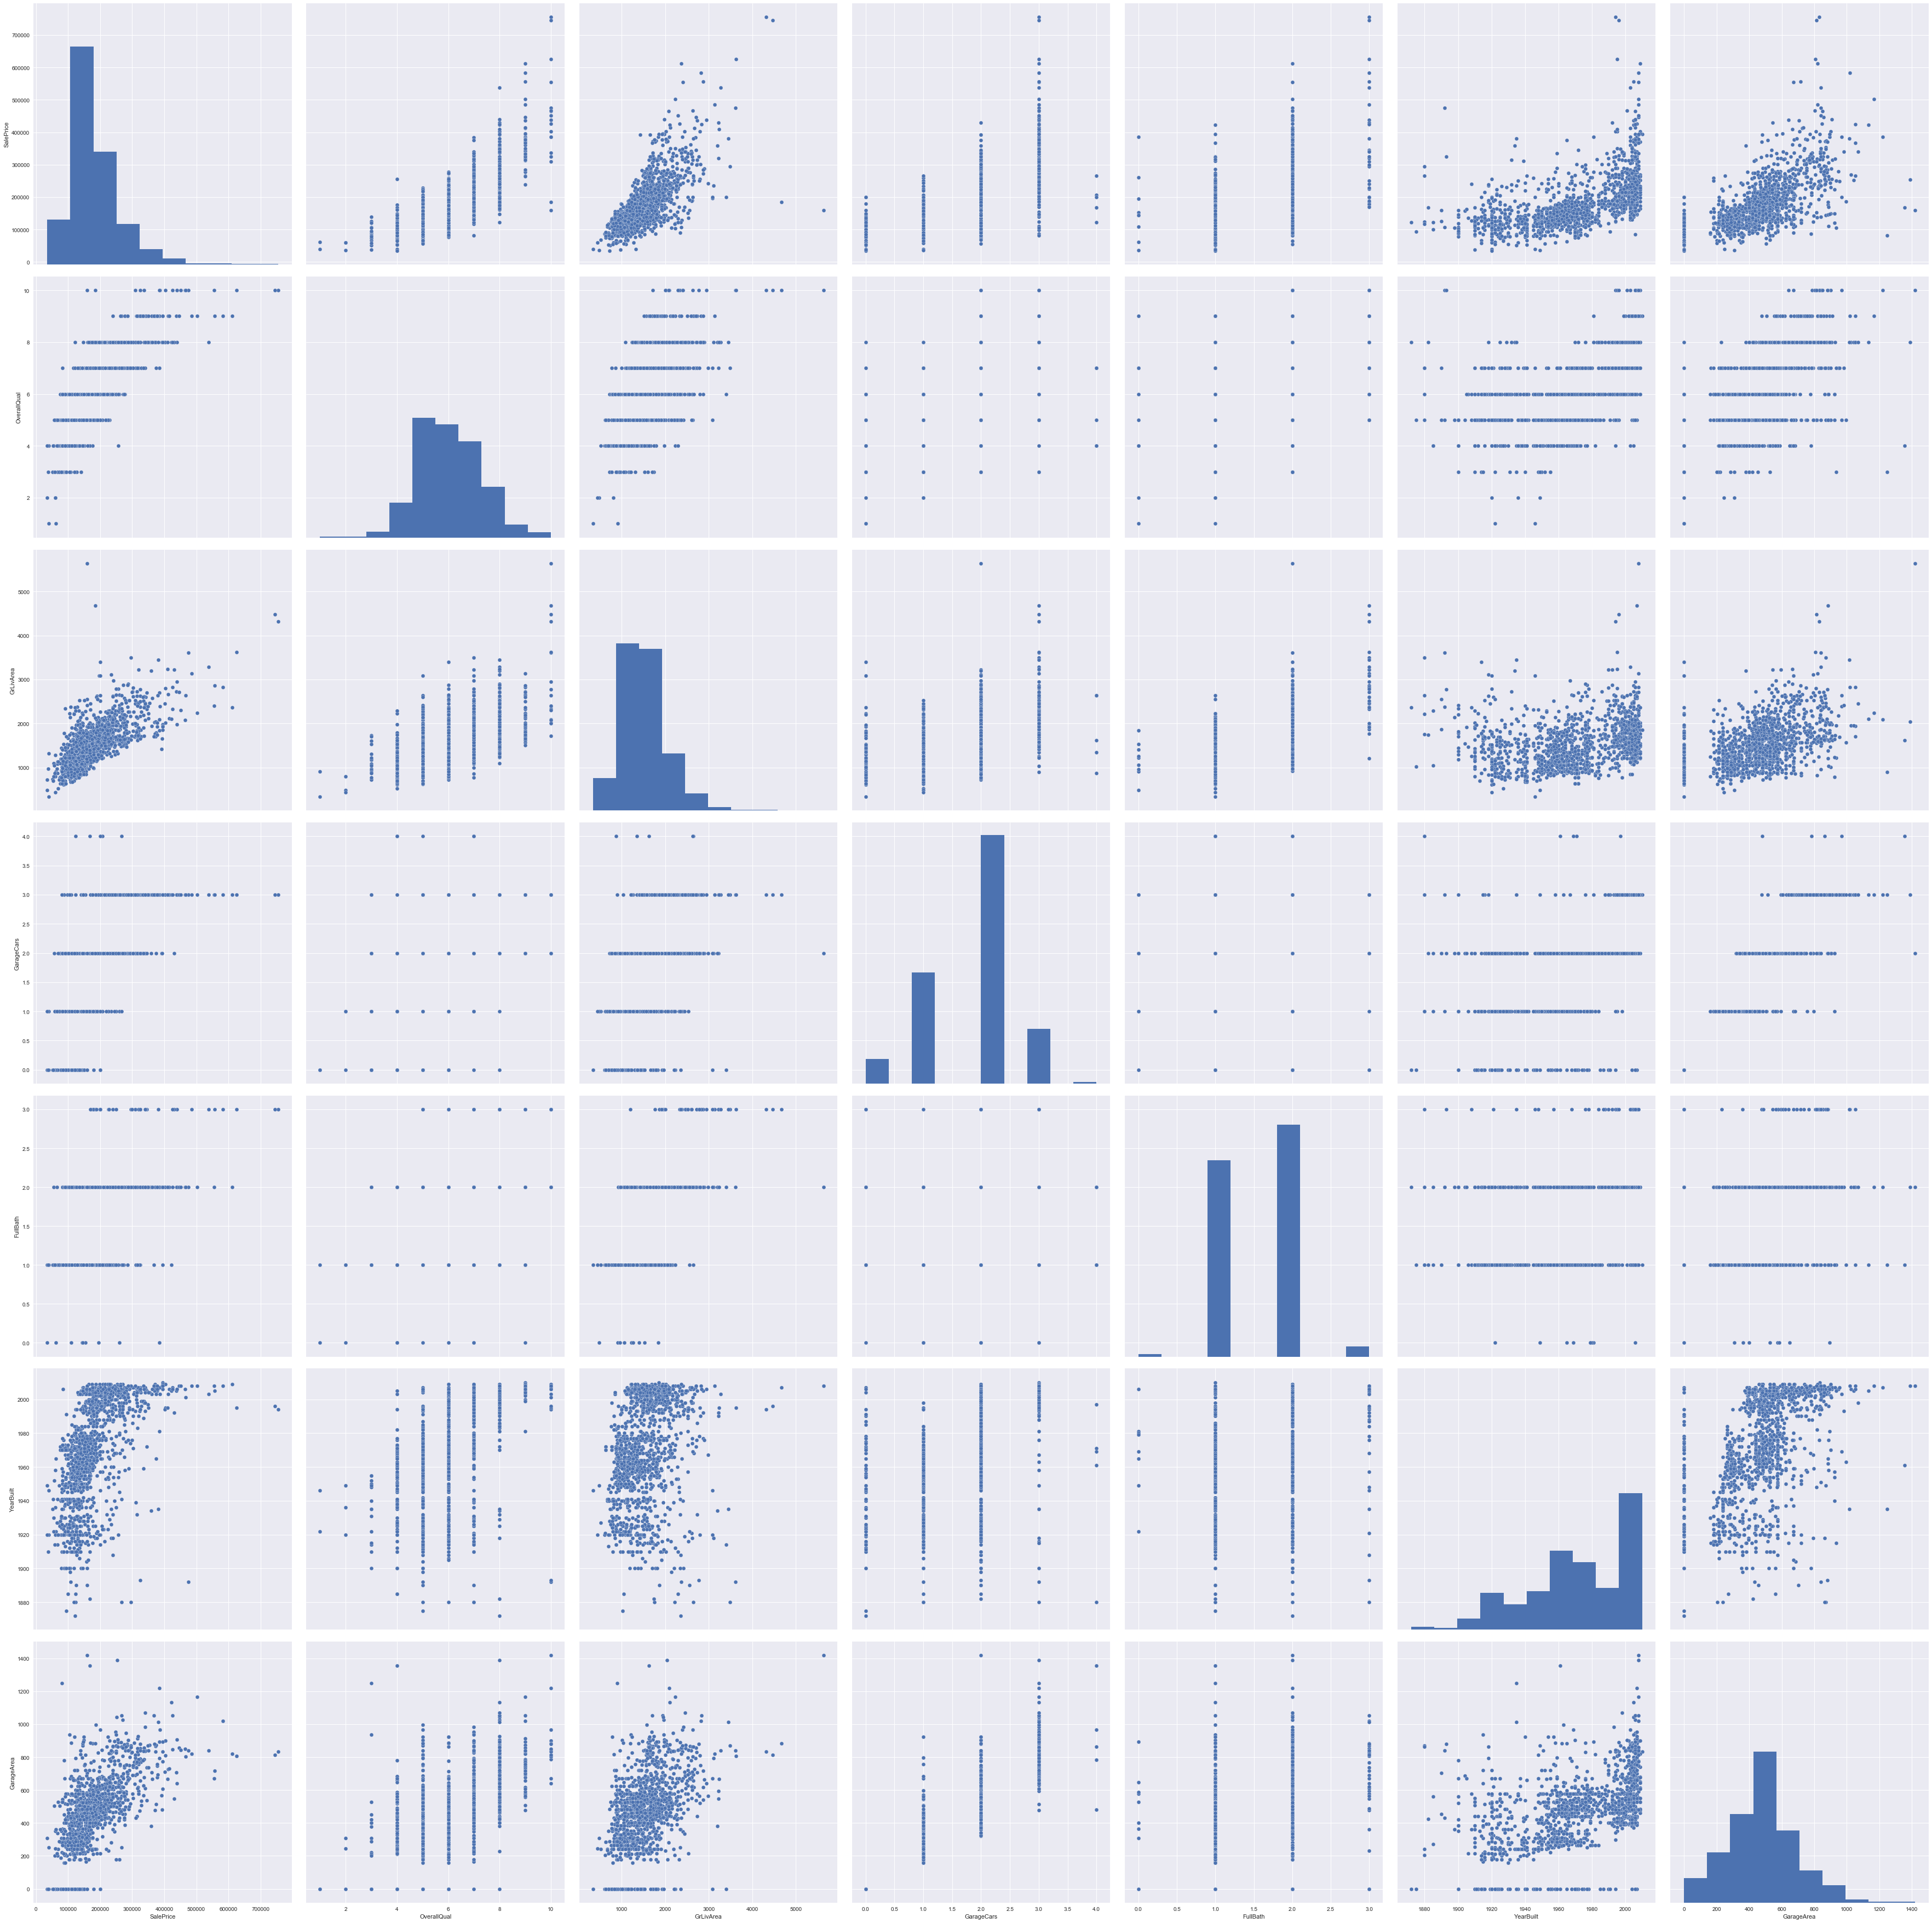

In [90]:
#scatter plot
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','FullBath','YearBuilt','GarageArea']
sns.pairplot(train[cols],size=7)
plt.show()

In [91]:
total=train.isnull().sum()
missing=pd.concat([total],axis=1,keys=['total'])

In [92]:
missing.head(10)

,total
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


In [93]:
missing[missing['total']>1]

,total
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
FireplaceQu,690


In [94]:
#remove the null data
train=train.drop((missing[missing['total']>1]).index,1)
train=train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
                ..
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

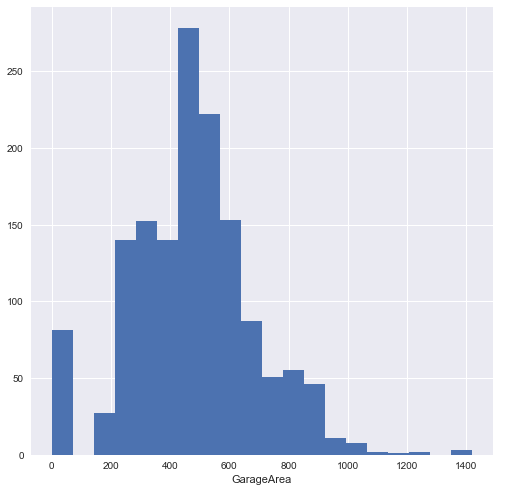

In [95]:
#anamoly data in Garage Area
sns.FacetGrid(train,size=7)\
.map(plt.hist,'GarageArea',bins=20)\
.add_legend()

In [102]:
GarageData=pd.concat([train['GarageArea']],axis=1,keys=['GaragData'])

In [116]:
GarageData[GarageData['GaragData']<150]

,GaragData
39,0
48,0
78,0
88,0
89,0
99,0
108,0
125,0
127,0
140,0


In [107]:
train=train.drop((GarageData[GarageData['GaragData'] < 100]).index)

In [118]:
train=train.drop((GarageData[GarageData['GaragData'] > 1200]).index)

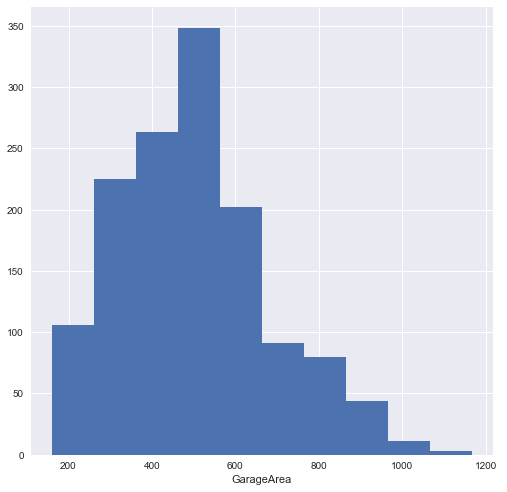

In [120]:
#anamoly data in Garage Area
sns.FacetGrid(train,size=7)\
.map(plt.hist,'GarageArea',bins=10)\
.add_legend()

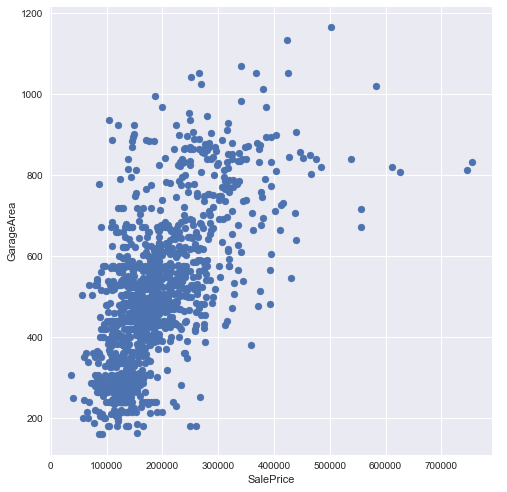

In [121]:
sns.FacetGrid(train,size=7)\
.map(plt.scatter,'SalePrice','GarageArea')\
.add_legend()

In [122]:
#2. Create Ridge linear regression for the dataset at the source code
#Evaluate the modelusing RMSE and R2 score.

In [123]:
train_we=pd.read_csv('weatherHistory.csv')

In [124]:
train_we.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.


In [125]:
train_we.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [126]:
train_we.shape

(96453, 11)

In [140]:
train_we=train_we[pd.notnull(train_we['Precip Type'])]

In [141]:
train_we.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [152]:
train_we['Summary']=pd.get_dummies(train_we.Summary,drop_first=True)



In [154]:
train_we.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,0,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,0,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.


In [190]:
y=np.array(train_we['Temperature (C)'])
x=train_we.drop(['Daily Summary','Loud Cover','Precip Type','Temperature (C)'],axis=1)

In [192]:
y.shape

(95936,)

In [193]:
x.shape

(95936, 7)

In [194]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=.33)

In [195]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64277 entries, 15196 to 15795
Data columns (total 7 columns):
Summary                     64277 non-null uint8
Apparent Temperature (C)    64277 non-null float64
Humidity                    64277 non-null float64
Wind Speed (km/h)           64277 non-null float64
Wind Bearing (degrees)      64277 non-null int64
Visibility (km)             64277 non-null float64
Pressure (millibars)        64277 non-null float64
dtypes: float64(5), int64(1), uint8(1)
memory usage: 3.5 MB


In [196]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)

In [197]:
y_pred

array([-1.50879671, 21.69389665, 16.2655822 , ..., 17.86531004,
       28.6345205 , 14.02918136])

In [200]:
# rmse on train set
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
r2=r2_score(Y_test,y_pred)
print("R2 score: {}".format(r2))

Root Mean Squared Error: 0.9472704172623414
R2 score: 0.9902159508516941


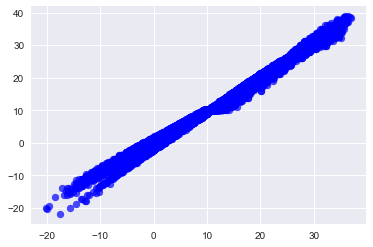

In [206]:
plt.scatter(y_pred,Y_test,alpha=0.7,color='b')
plt.show()

In [202]:
Y_test.shape

(31659,)

In [203]:
y_pred.shape

(31659,)

In [204]:
Y_test

array([-0.55555556, 21.11111111, 16.6       , ..., 17.73333333,
       28.77222222, 12.11111111])

In [205]:
y_pred

array([-1.50879671, 21.69389665, 16.2655822 , ..., 17.86531004,
       28.6345205 , 14.02918136])

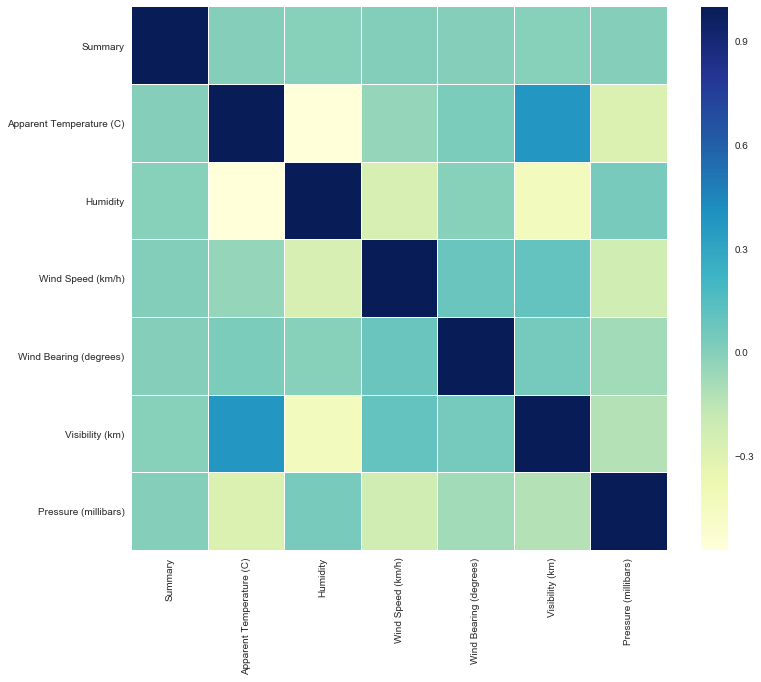

In [209]:
corr=X_train.corr(method='spearman')
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corr,ax=ax,cmap='YlGnBu',linewidths=0.1)